Okay, let's see how this goes. Learning how to use Jupyter Notebooks and Numpy at the same time, should be fun. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.1 Plotting the Data

Reading in the data with np.genfromtxt, it's a "new" way to get data directly into a numpy array, efficient.


In [6]:
data1 = np.genfromtxt('ex1data1.txt', delimiter=',')
x = data1[:,0][np.newaxis].T
y = data1[:,1][np.newaxis].T

x = np.insert(x, 0, 1, axis=1)
print('x array has the shape: ' + str(x.shape))
print('y array has the shape: ' + str(y.shape))

x array has the shape: (97, 2)
y array has the shape: (97, 1)


Quick visualization of the training data.

Text(0, 0.5, 'Profit in $10,000s')

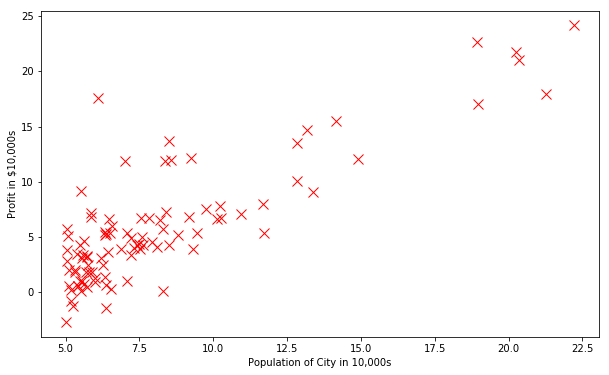

In [39]:
plt.figure(figsize=(10,6))
plt.plot(x, y,'rx',markersize=10)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

This graph isn't complete, but i spent quite a bit of time figuring out how to plot it in seaborn that i should just include it.

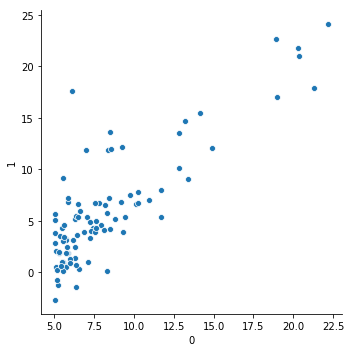

In [35]:
df = pd.DataFrame(data1)
df.head()
sns.relplot(x=0, y=1, data=df, )

2.2 Gradient Descent

Cost Function (MSE) & Linear hypothesis function

In [8]:
def compute_cost(x, y, theta):
    m = y.size
    J = 0
    h = np.dot(x, theta)
    J = 1/(2*m)*np.sum((h - y)**2)
    return J

In [17]:
test_initial = compute_cost(x, y, theta=[[0], [0]])
print(test_initial)

test_values = compute_cost(x, y, theta=[[-1], [2]])
print(test_values)

32.072733877455676
54.24245508201238


In [61]:
def gradient_descent(x, y, theta, alpha, num_iters):
    m = y.size
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = np.dot(x, theta)
        theta = theta - (alpha/m) * (x.T.dot(h - y))
        J_history.append(compute_cost(x, y, theta))
    return theta

In [62]:
theta = [[0], [0]]

iterations = 1500
alpha = 0.01

theta = gradient_descent(x, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


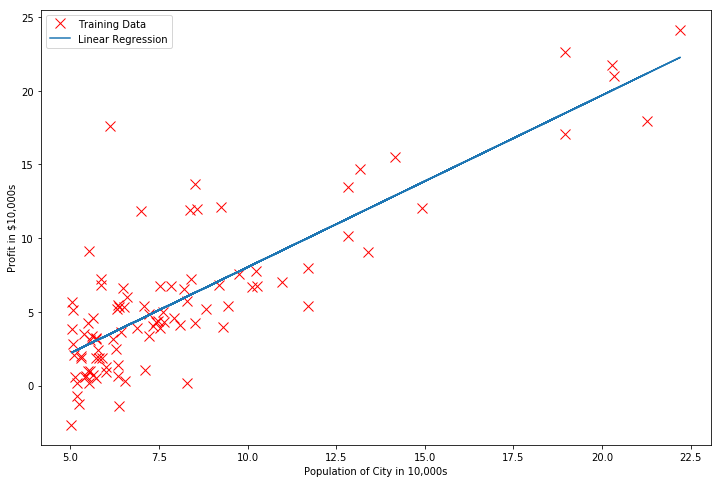

In [67]:
plt.figure(figsize=(12,8))
plt.plot(x[:,1], y,'rx',markersize=10)
plt.plot(x[:,1], np.dot(x, theta), '-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(['Training Data', 'Linear Regression'])